# Weather Forecast Using  PyOWM
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
PyOWM is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1. Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [55]:
# import libraries
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit 

### 1.1 Setting PyOWM API key and defining variable
This first part of the workflow we define the API key to access OpenWeather service and also the cell to contain the parameter `city` that can be defined using Papermill.

In [34]:
# Set API key
owm = pyowm.OWM('3fb62110b42fec1124c89b9931aed05b')

In [35]:
# Define the default parameters
city = 'Miami,US'
#city = 'Rio de Janeiro,BR'

### 1.2 Fetching weather information for the defined city
On this part we are going to use PyOWM to fetch data about the city and organized it first on a dictionary, them on a Pandas DataFrame.

In [36]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [37]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [38]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [39]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [40]:
# Set dtype to datetime for 'datetime' column 
df['datetime'] = pd.to_datetime(df['datetime'])

In [41]:
df

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-09 03:00:00+00:00,0,68,22.68,24.09,22.68,clear sky,http://openweathermap.org/img/w/01n.png,0.00
1,2019-12-09 06:00:00+00:00,0,65,23.05,24.11,23.05,clear sky,http://openweathermap.org/img/w/01n.png,0.00
2,2019-12-09 09:00:00+00:00,1,66,23.43,24.13,23.43,clear sky,http://openweathermap.org/img/w/01n.png,0.00
3,2019-12-09 12:00:00+00:00,0,65,23.87,24.22,23.87,clear sky,http://openweathermap.org/img/w/01d.png,0.00
4,2019-12-09 15:00:00+00:00,0,70,24.30,24.30,24.30,clear sky,http://openweathermap.org/img/w/01d.png,0.00
5,2019-12-09 18:00:00+00:00,15,73,24.59,24.59,24.59,few clouds,http://openweathermap.org/img/w/02d.png,0.00
6,2019-12-09 21:00:00+00:00,63,76,24.87,24.87,24.87,broken clouds,http://openweathermap.org/img/w/04d.png,0.00
7,2019-12-10 00:00:00+00:00,74,76,25.20,25.20,25.20,broken clouds,http://openweathermap.org/img/w/04n.png,0.00
8,2019-12-10 03:00:00+00:00,18,78,25.42,25.42,25.42,light rain,http://openweathermap.org/img/w/10n.png,0.44
9,2019-12-10 06:00:00+00:00,9,78,25.68,25.68,25.68,light rain,http://openweathermap.org/img/w/10n.png,0.44


### 1.3 Understanding the DataFrame generated from the returned data.
The function `owm.three_hours_forecast(city)` returns us information in 3 hour steps, for the next 5 days, with a total of 40 data points.
We decided to work with the following variables:
* clouds
* humidity
* temp
* temp_max
* temp_min
* detailed_status
* rain_vol

### 1.4 Aggregating data based on the days
On this step we are going to aggregate the data by day to facilitate the understanding and the plotting.

In [42]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
#df_mean.drop('datetime', axis=1, inplace=True)
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-09,11.285714,69.000,23.827143,24.33000,23.827143,0.00000
2019-12-10,13.375000,80.000,25.527500,25.52750,25.527500,0.14125
2019-12-11,1.125000,81.875,25.607500,25.60750,25.607500,0.56375
2019-12-12,16.250000,77.500,25.193750,25.19375,25.193750,1.22000
2019-12-13,45.875000,75.125,24.762500,24.76250,24.762500,0.15625
2019-12-14,99.000000,78.000,24.950000,24.95000,24.950000,0.00000


In [43]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-09,63,76,24.87,24.87,24.87,few clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-12-10,74,83,25.85,25.85,25.85,light rain,http://openweathermap.org/img/w/10n.png,0.44
2019-12-11,4,83,25.99,25.99,25.99,light rain,http://openweathermap.org/img/w/10n.png,1.06
2019-12-12,81,80,25.62,25.62,25.62,moderate rain,http://openweathermap.org/img/w/10n.png,3.81
2019-12-13,99,78,25.08,25.08,25.08,overcast clouds,http://openweathermap.org/img/w/10n.png,0.44
2019-12-14,99,78,24.95,24.95,24.95,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00


In [44]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-09,0,65,22.68,24.09,22.68,broken clouds,http://openweathermap.org/img/w/01d.png,0.0
2019-12-10,0,76,25.20,25.20,25.20,broken clouds,http://openweathermap.org/img/w/01d.png,0.0
2019-12-11,0,79,25.25,25.25,25.25,clear sky,http://openweathermap.org/img/w/01n.png,0.0
2019-12-12,0,74,24.77,24.77,24.77,clear sky,http://openweathermap.org/img/w/01n.png,0.0
2019-12-13,0,73,24.45,24.45,24.45,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-14,99,78,24.95,24.95,24.95,overcast clouds,http://openweathermap.org/img/w/04n.png,0.0


In [45]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
2019-12-09,22.68,24.87,23.827143
2019-12-10,25.20,25.85,25.527500
2019-12-11,25.25,25.99,25.607500
2019-12-12,24.77,25.62,25.193750
2019-12-13,24.45,25.08,24.762500
2019-12-14,24.95,24.95,24.950000


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

### 2.1 Temperature plot
Show the forecast for maximun, minimun and average temperature for the next 5 days on the same plots.

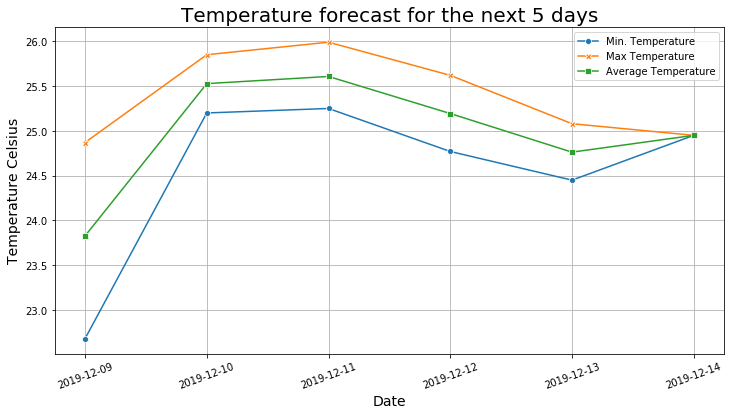

In [52]:
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for the next 5 days', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.grid(True)

sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])
fig.set_size_inches(12, 6)

sns_plot.figure.savefig(f'{city}_temperature.png', 
                  dpi=600, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')


### 2.2 Humidity, rain and clouds plot
On this plot we are going to aggregate the data about pluviometry and humidity.

In [47]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day.index = df_rain_per_day.index.date
df_rain_per_day

,rain_vol
2019-12-09,0.00
2019-12-10,1.13
2019-12-11,4.51
2019-12-12,9.76
2019-12-13,1.25
2019-12-14,0.00


In [48]:
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-09,11.285714,69.000,23.827143,24.33000,23.827143,0.00000
2019-12-10,13.375000,80.000,25.527500,25.52750,25.527500,0.14125
2019-12-11,1.125000,81.875,25.607500,25.60750,25.607500,0.56375
2019-12-12,16.250000,77.500,25.193750,25.19375,25.193750,1.22000
2019-12-13,45.875000,75.125,24.762500,24.76250,24.762500,0.15625
2019-12-14,99.000000,78.000,24.950000,24.95000,24.950000,0.00000


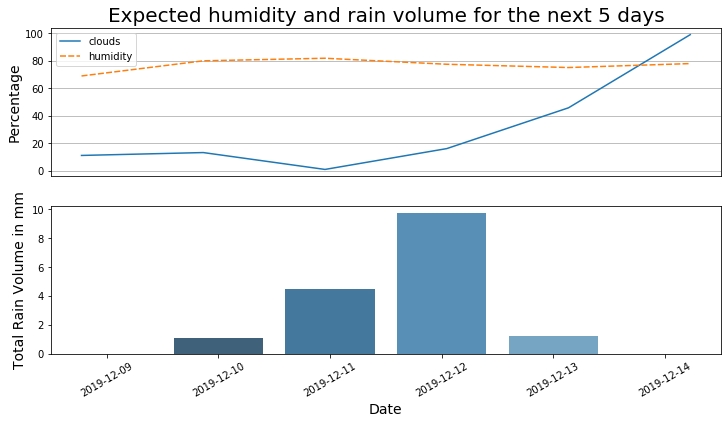

In [53]:
fig = plt.figure()
# Lineplot for humidity and clouds
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']])
ax1.set_xticks([])
ax1.set_title(f'Expected humidity and rain volume for the next 5 days', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.grid(True)

# Barplot for total rain per day
ax2 = fig.add_subplot(212)
ax2 = sns.barplot(x=df_rain_per_day.index, y='rain_vol', 
                  data=df_rain_per_day,
                  palette="Blues_d")
ax2.set_xticklabels(df_temp.index, rotation=30)
ax2.set_ylabel('Total Rain Volume in mm', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
fig.set_size_inches(12, 6)
fig.savefig(f'{city}_rain_humidity.png', 
                  dpi=600, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')


In [50]:
### 3 Creating the weather report



In [ ]:
# Missing variable for the report

In [75]:
report_template = """
<!DOCTYPE html>
    <html>
      <head>
        <meta charset="utf-8">
        <title>Weather Forecast with PyOWM</title>
        <link rel="stylesheet" href="report.css">
          <style>
          h1 {
          color: blue;
          font-family: Arial;
          font-size: 300%;
          }
          h2 {
          font-family: Arial;
          font-size: 200%;
          }
          @page {
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }
          </style>                       
      </head>
      <h1 align="center">Weather forecast for {city}</h1>
      <h2 align="center">Initial date: {today}</h2>
      <h2 align="center">Final date: {last_day}</h2>
        
      <figure>
        <img src="{temperature_plot" width="1200" height="600">
      </figure>
      <figure>
        <img src="{rain_humidity_plot}" width="1200" height="600">
      </figure>      
    </html>
"""

In [76]:
report_template

'\n<!DOCTYPE html>\n    <html>\n      <head>\n        <meta charset="utf-8">\n        <title>Weather Forecast with PyOWM</title>\n        <link rel="stylesheet" href="report.css">\n          <style>\n          h1 {\n          color: blue;\n          font-family: Arial;\n          font-size: 300%;\n          }\n          h2 {\n          font-family: Arial;\n          font-size: 200%;\n          }\n          @page {\n          size: 7in 9.25in;\n          margin: 27mm 16mm 27mm 16mm;\n          }\n          </style>                       \n      </head>\n      <h1 align="center">Weather forecast for {city}</h1>\n      <h2 align="center">Initial date: {today}</h2>\n      <h2 align="center">Final date: {last_day}</h2>\n        \n      <figure>\n        <img src="{temperature_plot" width="1200" height="600">\n      </figure>\n      <figure>\n        <img src="{rain_humidity_plot}" width="1200" height="600">\n      </figure>      \n    </html>\n'

In [90]:
#
today = str(df_mean.index.min())
last_day = str(df_mean.index.max())
rain_humidity_plot = 'Miami,US_rain_humidity.png'
temperature_plot = 'Miami,US_temperature.png'

In [96]:
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Weather Forecast with PyOWM</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h1 align="center">Weather forecast for {city}</h1>
      <h2 align="center">Initial date: {today}</h2>
      <h2 align="center">Final date: {last_day}</h2>
        
      <figure>
        <img src="{temperature_plot}" width="1200" height="600">
      </figure>
      <figure>
        <img src="{rain_humidity_plot}" width="1200" height="600">
      </figure>      
    </html>
'''

In [54]:
# Convert the html to pdf
pdfkit.from_file('/home/gabriel/Documents/Repos/papermill_medium/weather_report.html', 'out.pdf') 

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True

In [97]:
pdfkit.from_string(report_template, 'weather_report_for.pdf') 

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True

In [83]:
report_template

'\n<!DOCTYPE html>\n    <html>\n      <head>\n        <meta charset=\'utf-8\'>\n        <title>Weather Forecast with PyOWM</title>\n        <link rel=\'stylesheet\' href=\'report.css\'>\n          <style>\n          h1 {\n          color: blue;\n          font-family: Arial;\n          font-size: 300%;\n          }\n          h2 {\n          font-family: Arial;\n          font-size: 200%;\n          }\n          @page {\n          size: 7in 9.25in;\n          margin: 27mm 16mm 27mm 16mm;\n          }\n          </style>                       \n      </head>\n      <h1 align="center">Weather forecast for {city}</h1>\n      <h2 align="center">Initial date: {today}</h2>\n      <h2 align="center">Final date: {last_day}</h2>\n        \n      <figure>\n        <img src="{temperature_plot" width="1200" height="600">\n      </figure>\n      <figure>\n        <img src="{rain_humidity_plot}" width="1200" height="600">\n      </figure>      \n    </html>\n'